# Explore TRAMS.csv - Surface Parking Zones Data

**Objective:** Load and perform initial exploration and cleaning of the `TRAMS.csv` dataset downloaded from Open Data BCN. This dataset contains information about surface parking zones (AREA Blau/Verda).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [2]:
file_path = '../data/raw/TRAMS.csv' # Relative path from notebooks/ to data/raw/

try:
    df_trams = pd.read_csv(file_path)
    print(f"Successfully loaded {file_path}")
    print(f"Shape: {df_trams.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure it was downloaded correctly.")
except Exception as e:
    print(f"Error loading file: {e}")

Successfully loaded ../data/raw/TRAMS.csv
Shape: (17275, 17)


In [12]:
# --- Recap Basic Info ---
if not df_trams.empty:
    print("--- Basic Info Recap ---")
    print(f"Shape (Rows, Columns): {df_trams.shape}")
    print("\nColumns and Data Types:")
    df_trams.info()
else:
    print("TRAMS DataFrame is empty.")

--- Basic Info Recap ---
Shape (Rows, Columns): (17275, 17)

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17275 entries, 0 to 17274
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID_TRAM      17275 non-null  int64   
 1   UTM_IX       17275 non-null  float64 
 2   UTM_FX       17275 non-null  float64 
 3   UTM_IY       17275 non-null  float64 
 4   UTM_FY       17275 non-null  float64 
 5   LATITUD_I    17275 non-null  float64 
 6   LONGITUD_I   17275 non-null  float64 
 7   LATITUD_F    17275 non-null  float64 
 8   LONGITUD_F   17275 non-null  float64 
 9   ID_TARIFA    17275 non-null  category
 10  ID_HORARIO   17275 non-null  category
 11  ID_TARIFA1   11643 non-null  float64 
 12  ID_HORARIO1  17275 non-null  int64   
 13  TIPUS_TRAM   17275 non-null  category
 14  ADREÇA       17275 non-null  object  
 15  COLOR_RGB    17275 non-null  object  
 16  PLACES       17275 non-null

In [13]:
# --- Missing Value Analysis ---
if not df_trams.empty:
    print("\n--- Missing Value Analysis ---")
    missing_counts = df_trams.isnull().sum()
    missing_percent = (df_trams.isnull().sum() / len(df_trams)) * 100
    missing_df = pd.DataFrame({'Count': missing_counts, 'Percentage': missing_percent})
    print(missing_df[missing_df['Count'] > 0].sort_values(by='Percentage', ascending=False))
    
    if missing_df['Count'].sum() == 0:
        print("\nNo missing values found in any column.")
else:
    print("Skipping Missing Value Analysis.")


--- Missing Value Analysis ---
            Count  Percentage
ID_TARIFA1   5632   32.602026


In [14]:
# --- Uniqueness Check (ID_TRAM) ---
if not df_trams.empty and 'ID_TRAM' in df_trams.columns:
    print("\n--- Uniqueness Check (ID_TRAM) ---")
    is_unique = df_trams['ID_TRAM'].is_unique
    print(f"Is ID_TRAM unique across all rows? {is_unique}")
    if not is_unique:
        duplicates = df_trams[df_trams.duplicated(subset=['ID_TRAM'], keep=False)]
        print(f"Number of duplicate ID_TRAM values found: {duplicates['ID_TRAM'].nunique()}")
        print(f"Total rows involved in duplicates: {len(duplicates)}")
        # print("Sample of duplicate rows:")
        # print(duplicates.sort_values(by='ID_TRAM').head()) # Uncomment to view sample duplicates
else:
     print("Skipping Uniqueness Check: DataFrame empty or 'ID_TRAM' column missing.")


--- Uniqueness Check (ID_TRAM) ---
Is ID_TRAM unique across all rows? False
Number of duplicate ID_TRAM values found: 3462
Total rows involved in duplicates: 10141


In [16]:
# --- Investigate ID_TRAM Duplicates ---
if not df_trams.empty and 'ID_TRAM' in df_trams.columns:
    if not df_trams['ID_TRAM'].is_unique:
        print("\n--- Investigating ID_TRAM Duplicates ---")
        
        # Find IDs that are duplicated
        duplicate_ids = df_trams[df_trams.duplicated(subset=['ID_TRAM'], keep=False)]['ID_TRAM'].unique()
        
        # Take a sample of these duplicated IDs
        sample_dup_ids = np.random.choice(duplicate_ids, min(5, len(duplicate_ids)), replace=False)
        print(f"Showing rows for {len(sample_dup_ids)} sample duplicated ID_TRAMs:")

        # Display all rows for the sample IDs
        sample_duplicate_rows = df_trams[df_trams['ID_TRAM'].isin(sample_dup_ids)].sort_values(by=['ID_TRAM', 'ID_HORARIO', 'ID_TARIFA1']) # Sort to easily compare rows
        
        # Increase display options to see more columns
        with pd.option_context('display.max_rows', 100, 'display.max_columns', 20, 'display.width', 200):
            print(sample_duplicate_rows)

        # Analyze which columns vary for duplicated IDs (checking across the entire duplicate set)
        print("\nAnalyzing which columns vary within duplicated ID_TRAMs...")
        duplicated_rows_df = df_trams[df_trams.duplicated(subset=['ID_TRAM'], keep=False)]
        variance_check = duplicated_rows_df.groupby('ID_TRAM').nunique()
        
        # Identify columns that have more than 1 unique value for at least one ID_TRAM
        varying_columns = variance_check.columns[ (variance_check > 1).any() ]
        print(f"\nColumns that vary for at least one duplicated ID_TRAM: {varying_columns.tolist()}")
        
        # Columns that are constant for *all* duplicated ID_TRAMs (value is always 1 in variance_check)
        constant_columns = variance_check.columns[ (variance_check == 1).all() ]
        print(f"Columns that seem constant within duplicated ID_TRAMs: {constant_columns.tolist()}")

    else:
        print("ID_TRAM is unique, no duplicates to investigate.")
else:
    print("Skipping ID_TRAM duplicate investigation.")


--- Investigating ID_TRAM Duplicates ---
Showing rows for 5 sample duplicated ID_TRAMs:
       ID_TRAM      UTM_IX      UTM_FX       UTM_IY       UTM_FY  LATITUD_I  LONGITUD_I  LATITUD_F  LONGITUD_F ID_TARIFA ID_HORARIO  ID_TARIFA1  ID_HORARIO1 TIPUS_TRAM                ADREÇA  \
96         125  431766.205  431775.139  4583384.160  4583374.800  41.399097    2.183728  41.399014    2.183836        54         13        52.0           13         VM        LEPANT, 170, C   
97         125  431766.379  431766.237  4583388.728  4583384.874  41.399138    2.183730  41.399103    2.183728        54         13        52.0           13         VM        LEPANT, 170, C   
98         125  431779.664  431828.104  4583370.123  4583320.433  41.398972    2.183891  41.398528    2.184476        54         13        52.0           13         VM        LEPANT, 170, C   
99         125  431834.529  431837.568  4583313.864  4583310.752  41.398470    2.184553  41.398442    2.184590        54         13        

In [17]:
# --- Foreign Key Analysis (Revisited) ---
if not df_trams.empty:
    print("\n--- Foreign Key Analysis (Revisited) ---")

    if 'ID_TARIFA1' in df_trams.columns:
        print("\nAnalysis of ID_TARIFA1:")
        print(f"Total rows: {len(df_trams)}")
        print(f"Missing ID_TARIFA1: {df_trams['ID_TARIFA1'].isnull().sum()} ({df_trams['ID_TARIFA1'].isnull().sum() / len(df_trams) * 100:.1f}%)")
        print("\nDescriptive Stats for non-missing ID_TARIFA1:")
        print(df_trams['ID_TARIFA1'].dropna().describe())
        print(f"Number of unique non-missing values: {df_trams['ID_TARIFA1'].dropna().nunique()}")
        
        # Check ID_TARIFA (categorical) values where ID_TARIFA1 is missing
        missing_tariff1 = df_trams[df_trams['ID_TARIFA1'].isnull()]
        if not missing_tariff1.empty and 'ID_TARIFA' in missing_tariff1.columns:
             print("\nAnalysis of corresponding 'ID_TARIFA' where 'ID_TARIFA1' is missing:")
             print(missing_tariff1['ID_TARIFA'].value_counts())
             # This might tell us if missing ID_TARIFA1 corresponds to specific types like DUM, Resident, etc.
        else:
             print("\nCould not analyze corresponding 'ID_TARIFA' for missing 'ID_TARIFA1'.")

    else:
        print("Column 'ID_TARIFA1' not found.")


    if 'ID_HORARIO' in df_trams.columns and 'ID_HORARIO1' in df_trams.columns:
        print("\nAnalysis of ID_HORARIO (Categorical) vs ID_HORARIO1 (Int):")
        print("\nID_HORARIO (Categorical):")
        print(df_trams['ID_HORARIO'].describe())
        print(f"Number of unique values: {df_trams['ID_HORARIO'].nunique()}")
        
        print("\nID_HORARIO1 (Int):")
        print(df_trams['ID_HORARIO1'].describe())
        print(f"Number of unique values: {df_trams['ID_HORARIO1'].nunique()}")

        # Check if they generally match (assuming ID_HORARIO is just the categorical version)
        try:
            mismatches = df_trams[df_trams['ID_HORARIO'].astype(str) != df_trams['ID_HORARIO1'].astype(str)]
            if not mismatches.empty:
                print(f"\nWarning: Found {len(mismatches)} rows where ID_HORARIO != ID_HORARIO1.")
                # print(mismatches[['ID_HORARIO', 'ID_HORARIO1']].head()) # Uncomment to see sample mismatches
            else:
                print("\nID_HORARIO (categorical) appears consistent with ID_HORARIO1 (int).")
        except Exception as e:
            print(f"\nCould not compare ID_HORARIO and ID_HORARIO1 directly: {e}")
            
        # Check for potentially invalid values in ID_HORARIO1
        invalid_horario_ids = df_trams[df_trams['ID_HORARIO1'] <= 0]
        if not invalid_horario_ids.empty:
             print(f"Found {len(invalid_horario_ids)} rows with potentially invalid ID_HORARIO1 (<= 0):")
             print(invalid_horario_ids['ID_HORARIO1'].value_counts())
        else:
             print("No potentially invalid ID_HORARIO1 (<= 0) found.")
    else:
        print("\nSkipping detailed Horario ID analysis (columns missing).")
else:
     print("Skipping Foreign Key Analysis.")


--- Foreign Key Analysis (Revisited) ---

Analysis of ID_TARIFA1:
Total rows: 17275
Missing ID_TARIFA1: 5632 (32.6%)

Descriptive Stats for non-missing ID_TARIFA1:
count    11643.0
mean        52.0
std          0.0
min         52.0
25%         52.0
50%         52.0
75%         52.0
max         52.0
Name: ID_TARIFA1, dtype: float64
Number of unique non-missing values: 1

Analysis of corresponding 'ID_TARIFA' where 'ID_TARIFA1' is missing:
ID_TARIFA
58    3095
47    1046
52     850
46     539
69      49
72      38
73      14
0        1
53       0
54       0
56       0
Name: count, dtype: int64

Analysis of ID_HORARIO (Categorical) vs ID_HORARIO1 (Int):

ID_HORARIO (Categorical):
count     17275
unique       56
top          13
freq      11423
Name: ID_HORARIO, dtype: int64
Number of unique values: 56

ID_HORARIO1 (Int):
count    1.727500e+04
mean     3.475973e+04
std      1.863388e+06
min      0.000000e+00
25%      1.300000e+01
50%      1.300000e+01
75%      2.600000e+01
max      1.00000

In [19]:
# --- Numeric Column Analysis (LONGITUD) ---
if not df_trams.empty and 'LONGITUD' in df_trams.columns:
     print("\n--- Numeric Column Analysis (LONGITUD) ---")
     print("Descriptive Statistics for LONGITUD:")
     print(df_trams['LONGITUD'].describe())
     # Optional: Plot histogram to check distribution visually
     try:
          import matplotlib.pyplot as plt
          plt.figure(figsize=(10, 4))
          plt.hist(df_trams['LONGITUD'].dropna(), bins=50)
          plt.title('Distribution of Segment Length (LONGITUD)')
          plt.xlabel('Length (meters?)') # Assuming meters based on UTM
          plt.ylabel('Frequency')
          plt.grid(axis='y', alpha=0.75)
          plt.show()
          
          # Check for zero or negative lengths
          invalid_lengths = df_trams[df_trams['LONGITUD'] <= 0]
          if not invalid_lengths.empty:
              print(f"\nWarning: Found {len(invalid_lengths)} segments with LONGITUD <= 0.")
              # print(invalid_lengths[['ID_TRAM', 'LONGITUD']].head())
          else:
              print("\nNo segments with LONGITUD <= 0 found.")

     except ImportError:
          print("Matplotlib not installed, skipping histogram.")
else:
     print("Skipping Numeric Column Analysis: DataFrame empty or 'LONGITUD' column missing.")

Skipping Numeric Column Analysis: DataFrame empty or 'LONGITUD' column missing.



--- Numeric Column Analysis (PLACES) ---
Descriptive Statistics for PLACES:
count    17275.000000
mean         9.773430
std         12.642242
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        218.000000
Name: PLACES, dtype: float64

PLACES
0    1
Name: count, dtype: int64


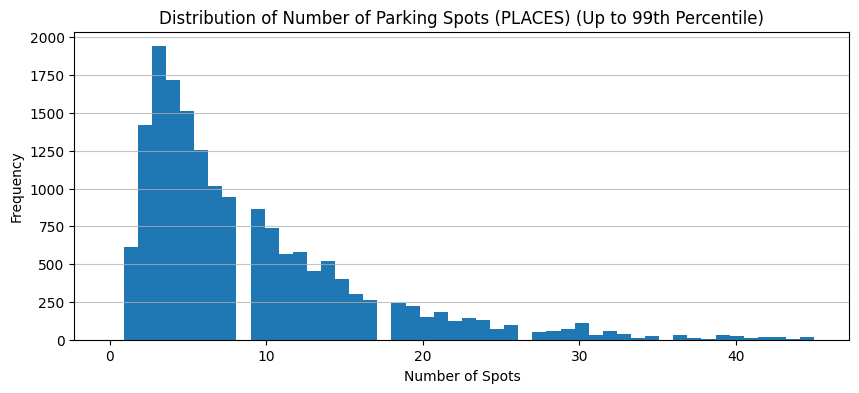

In [20]:
# --- Numeric Column Analysis (PLACES) ---
if not df_trams.empty and 'PLACES' in df_trams.columns:
     print("\n--- Numeric Column Analysis (PLACES) ---")
     print("Descriptive Statistics for PLACES:")
     print(df_trams['PLACES'].describe())
     
     # Check for zero or negative values
     invalid_places = df_trams[df_trams['PLACES'] <= 0]
     if not invalid_places.empty:
         print(f"\nWarning: Found {len(invalid_places)} segments with PLACES <= 0.")
         print(invalid_places['PLACES'].value_counts())
     else:
         print("\nNo segments with PLACES <= 0 found.")
         
     # Optional: Plot histogram to check distribution visually
     try:
          import matplotlib.pyplot as plt
          plt.figure(figsize=(10, 4))
          # Filter out potential outliers for a clearer view of the common range
          plt.hist(df_trams[df_trams['PLACES'] < df_trams['PLACES'].quantile(0.99)]['PLACES'].dropna(), bins=50) # Plotting up to 99th percentile
          plt.title('Distribution of Number of Parking Spots (PLACES) (Up to 99th Percentile)')
          plt.xlabel('Number of Spots')
          plt.ylabel('Frequency')
          plt.grid(axis='y', alpha=0.75)
          plt.show()
     except ImportError:
          print("Matplotlib not installed, skipping histogram.")
else:
     print("Skipping Numeric Column Analysis: DataFrame empty or 'PLACES' column missing.")


In [23]:
# --- Text Column Analysis (ADREÇA) ---
if not df_trams.empty and 'ADREÇA' in df_trams.columns:
     print("\n--- Text Column Analysis (ADREÇA) ---")
     print(f"Number of unique addresses (ADREÇA): {df_trams['ADREÇA'].nunique()}")
     print("\nTop 10 most frequent addresses:")
     print(df_trams['ADREÇA'].value_counts().head(10))
     # How many addresses are associated with only one segment? (Less common due to ID_TRAM duplication)
     # address_counts = df_trams.groupby('ADREÇA')['ID_TRAM'].nunique() # Count unique TRAM IDs per address
     # print(f"\nNumber of addresses associated with only one logical ID_TRAM: {(address_counts == 1).sum()}")

     # Check for empty strings or unusually short addresses
     empty_address = df_trams[df_trams['ADREÇA'].str.strip() == '']
     if not empty_address.empty:
          print(f"\nWarning: Found {len(empty_address)} rows with empty ADREÇA.")
     short_address = df_trams[df_trams['ADREÇA'].str.len() < 5] # Arbitrary threshold
     if not short_address.empty:
           print(f"\nWarning: Found {len(short_address)} rows with potentially too short ADREÇA (less than 5 chars):")
           # print(short_address['ADREÇA'].value_counts())
     else:
         print("\nNo potentially empty or very short addresses found.")
else:
     print("Skipping Text Column Analysis: DataFrame empty or 'ADREÇA' column missing.")



--- Text Column Analysis (ADREÇA) ---
Number of unique addresses (ADREÇA): 10585

Top 10 most frequent addresses:
ADREÇA
ALTS FORNS, 51 bis  (Jrd.Alboreda ), C         28
FRANCESC FERRER GUARDIA, 29, SECTOR B2 , AV    25
FRANCESC FERRER GUARDIA, 30, SECTOR A2, AV     24
ALTS FORNS, 29 (Illa interior), C              22
MONTANYANS, 26, AV                             18
VERNEDA, 125, PG                               18
MONTANYANS, 6, AV                              16
FERRAN TURNE, 13, C                            16
EMILIA LLORCA MARTIN, 3-13, C                  14
EMILIA LLORCA MARTIN, 15-27, C                 14
Name: count, dtype: int64

No potentially empty or very short addresses found.



--- Geometry Construction and Quality Check (from Coordinates) ---
Number of null coordinate values found: 0
Constructing LineString geometries from start/end coordinates...

Number of invalid geometries (construction error, null coords, zero length, or !is_valid): 1
Number of zero-length segments found (start == end): 1

Creating GeoDataFrame...
GeoDataFrame created with 17274 valid geometries.

Plotting a sample of the constructed geometries...


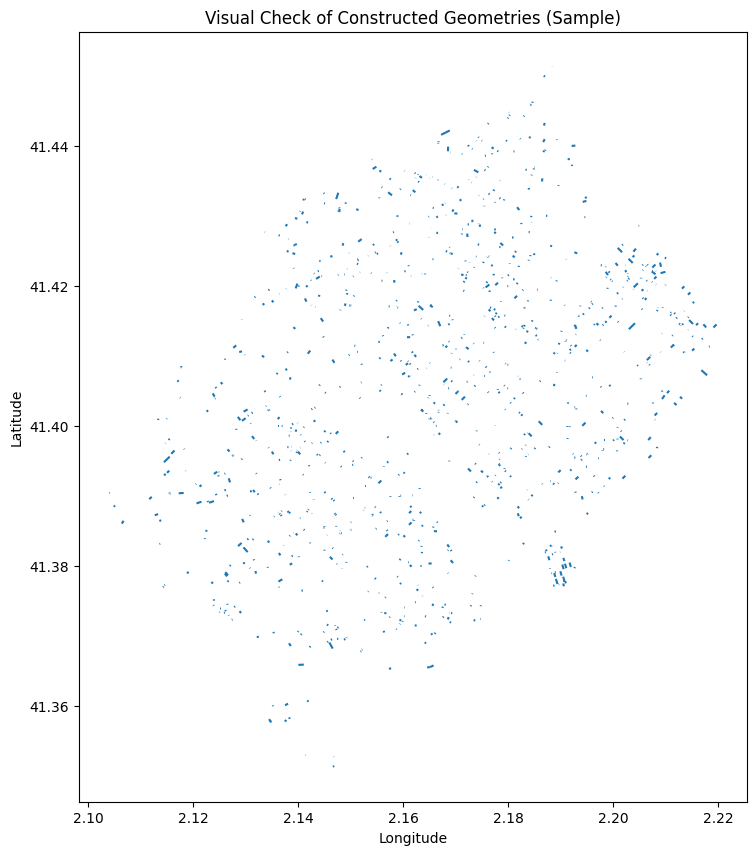


--- End of TRAMS Geometry Construction and Quality Check ---


In [24]:
# --- Geometry Construction and Quality Check (from Coordinates) ---
if not df_trams.empty and all(col in df_trams.columns for col in ['LONGITUD_I', 'LATITUD_I', 'LONGITUD_F', 'LATITUD_F']):
    print("\n--- Geometry Construction and Quality Check (from Coordinates) ---")

    # 1. Check for null coordinates (shouldn't be any based on .info(), but good practice)
    coord_cols = ['LONGITUD_I', 'LATITUD_I', 'LONGITUD_F', 'LATITUD_F']
    null_coords = df_trams[coord_cols].isnull().sum().sum()
    print(f"Number of null coordinate values found: {null_coords}")

    # 2. Attempt to construct LineString geometries and validate
    invalid_geom_count = 0
    zero_length_count = 0
    geometries = []
    try:
        import geopandas as gpd
        from shapely.geometry import Point, LineString
        from shapely.errors import GEOSException

        print("Constructing LineString geometries from start/end coordinates...")
        
        for index, row in df_trams.iterrows():
            try:
                # Check for NaN values before creating points
                if pd.isna(row['LONGITUD_I']) or pd.isna(row['LATITUD_I']) or \
                   pd.isna(row['LONGITUD_F']) or pd.isna(row['LATITUD_F']):
                   geometries.append(None)
                   invalid_geom_count += 1 # Treat rows with missing coords as invalid
                   continue

                point_start = Point(row['LONGITUD_I'], row['LATITUD_I'])
                point_end = Point(row['LONGITUD_F'], row['LATITUD_F'])

                # Check if start and end points are the same (zero-length line)
                if point_start.equals(point_end):
                    zero_length_count += 1
                    # Optionally, represent as the point itself or None
                    # geometries.append(point_start) # Or append None if zero-length lines are invalid
                    geometries.append(None) # Let's treat zero-length as invalid for parking segments
                    invalid_geom_count += 1
                    continue
                
                # Create LineString
                line = LineString([point_start, point_end])
                
                # Check validity (less likely to fail for simple lines, but possible)
                if not line.is_valid:
                    invalid_geom_count += 1
                    geometries.append(None) # Treat invalid as None
                else:
                    geometries.append(line)

            except (GEOSException, ValueError) as e:
                 # Catch potential errors during Point/LineString creation
                 print(f"Error creating geometry for row index {index}, ID_TRAM {row.get('ID_TRAM', 'N/A')}: {e}")
                 invalid_geom_count += 1
                 geometries.append(None)

        print(f"\nNumber of invalid geometries (construction error, null coords, zero length, or !is_valid): {invalid_geom_count}")
        print(f"Number of zero-length segments found (start == end): {zero_length_count}")

        # --- Create GeoDataFrame (Crucial for spatial operations and correct plotting) ---
        print("\nCreating GeoDataFrame...")
        # Use WGS84 (EPSG:4326) as CRS since coordinates are Lat/Lon
        gdf_trams = gpd.GeoDataFrame(df_trams, geometry=geometries, crs="EPSG:4326") 
        # Remove rows where geometry construction failed
        gdf_trams = gdf_trams[gdf_trams.geometry.notna()].copy()
        print(f"GeoDataFrame created with {len(gdf_trams)} valid geometries.")

        # --- Optional: Plotting ---
        print("\nPlotting a sample of the constructed geometries...")
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        # Plot a sample to avoid overcrowding
        sample_gdf = gdf_trams.sample(min(1000, len(gdf_trams))) 
        sample_gdf.plot(ax=ax)
        ax.set_title('Visual Check of Constructed Geometries (Sample)')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.show()


    except ImportError:
        print("\nError: GeoPandas or Shapely not installed. Cannot construct/validate geometries.")
        print("Install with: pip install geopandas shapely")
    except Exception as e:
        print(f"\nAn error occurred during geometry processing: {e}")

else:
    print("Skipping Geometry Construction: DataFrame empty or coordinate columns missing.")

print("\n--- End of TRAMS Geometry Construction and Quality Check ---")

In [3]:
## 2. Initial inspection

# Display first few rows
if 'df_trams' in locals():
    display(df_trams.head())

,ID_TRAM,UTM_IX,UTM_FX,UTM_IY,UTM_FY,LATITUD_I,LONGITUD_I,LATITUD_F,LONGITUD_F,ID_TARIFA,ID_HORARIO,ID_TARIFA1,ID_HORARIO1,TIPUS_TRAM,ADREÇA,COLOR_RGB,PLACES
0,7,431371.206,431359.176,4582803.652,4582803.655,41.393835,2.179069,41.393834,2.178925,46,82,NaN,82,AZL,"ROGER DE FLOR, 79, C",0000FF,5
1,8,431322.330,431311.483,4582399.137,4582420.894,41.390188,2.178531,41.390383,2.178398,52,76,NaN,76,VR,"LLUIS EL PIADOS, 9 , C",008000,10
2,13,431288.758,431273.443,4582305.752,4582322.247,41.389344,2.178140,41.389491,2.177955,46,81,NaN,81,AZL,"MENDEZ NUÑEZ, 9, C",0000FF,9
3,14,431301.693,431288.550,4582318.450,4582330.947,41.389459,2.178293,41.389571,2.178134,46,81,NaN,81,AZL,"MENDEZ NUÑEZ, 4, C",0000FF,3
4,19,431498.403,431489.250,4582755.634,4582746.776,41.393414,2.180596,41.393333,2.180488,54,13,52.0,13,VM,"ALI BEI, 42, C",00FF00,8


In [4]:
# Display basic info (columns, non-null counts, data types)
if 'df_trams' in locals():
    df_trams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17275 entries, 0 to 17274
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_TRAM      17275 non-null  int64  
 1   UTM_IX       17275 non-null  float64
 2   UTM_FX       17275 non-null  float64
 3   UTM_IY       17275 non-null  float64
 4   UTM_FY       17275 non-null  float64
 5   LATITUD_I    17275 non-null  float64
 6   LONGITUD_I   17275 non-null  float64
 7   LATITUD_F    17275 non-null  float64
 8   LONGITUD_F   17275 non-null  float64
 9   ID_TARIFA    17275 non-null  int64  
 10  ID_HORARIO   17275 non-null  int64  
 11  ID_TARIFA1   11643 non-null  float64
 12  ID_HORARIO1  17275 non-null  int64  
 13  TIPUS_TRAM   17275 non-null  object 
 14  ADREÇA       17275 non-null  object 
 15  COLOR_RGB    17275 non-null  object 
 16  PLACES       17275 non-null  int64  
dtypes: float64(9), int64(5), object(3)
memory usage: 2.2+ MB


In [5]:
# Display descriptive statistics
if 'df_trams' in locals():
    display(df_trams.describe(include='all'))

,ID_TRAM,UTM_IX,UTM_FX,UTM_IY,UTM_FY,LATITUD_I,LONGITUD_I,LATITUD_F,LONGITUD_F,ID_TARIFA,ID_HORARIO,ID_TARIFA1,ID_HORARIO1,TIPUS_TRAM,ADREÇA,COLOR_RGB,PLACES
count,1.727500e+04,17275.000000,17275.000000,1.727500e+04,1.727500e+04,17275.000000,17275.000000,17275.000000,17275.000000,17275.000000,1.727500e+04,11643.0,1.727500e+04,17275,17275,17275,17275.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10585,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VM,"ALTS FORNS, 51 bis (Jrd.Alboreda ), C",00FF00,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11643,28,11643,NaN
mean,2.931233e+05,430303.175848,430305.555557,4.584097e+06,4.584098e+06,41.405392,2.166150,41.405401,2.166178,55.224370,3.475973e+04,52.0,3.475973e+04,NaN,NaN,NaN,9.773430
std,5.313259e+06,2080.939141,2081.257874,2.263431e+03,2.263818e+03,0.020452,0.024798,0.020455,0.024802,3.277914,1.863388e+06,0.0,1.863388e+06,NaN,NaN,NaN,12.642242
min,7.000000e+00,425047.692000,425038.582000,4.577920e+06,4.577916e+06,41.349569,2.103499,41.349533,2.103395,0.000000,0.000000e+00,52.0,0.000000e+00,NaN,NaN,NaN,0.000000
25%,4.616000e+03,428557.648500,428561.054500,4.582460e+06,4.582462e+06,41.390482,2.145420,41.390490,2.145498,56.000000,1.300000e+01,52.0,1.300000e+01,NaN,NaN,NaN,4.000000
50%,9.978000e+03,430422.618000,430429.472000,4.584173e+06,4.584175e+06,41.406110,2.167543,41.406145,2.167580,56.000000,1.300000e+01,52.0,1.300000e+01,NaN,NaN,NaN,7.000000
75%,1.523300e+04,431843.423500,431844.844000,4.585876e+06,4.585875e+06,41.421509,2.184384,41.421501,2.184419,56.000000,2.600000e+01,52.0,2.600000e+01,NaN,NaN,NaN,12.000000


In [6]:
## 3. Missing values

# Check for missing values
if 'df_trams' in locals():
    missing_values = df_trams.isnull().sum()
    print("Missing values per column:")
    print(missing_values[missing_values > 0]) # Show only columns with missing values

Missing values per column:
ID_TARIFA1    5632
dtype: int64


## 4. Data Types and Initial Cleaning

Observations from `.info()`:
*   Many coordinate columns (`UTM_*`, `LATITUD_*`, `LONGITUD_*`) and `PLACES` are currently `object` type and should likely be numeric.
*   ID columns (`_id`, `ID_TRAM`, `OBJECTID`, `ID_HORARIO`, `ID_TARIFA`) are numeric but could potentially be treated as categories or strings if not used arithmetically.
*   `TIPUS_TRAM`, `ADREÇA`, `COLOR_RGB` are objects (likely strings/categories).

In [7]:
if 'df_trams' in locals():
    # Columns to convert to numeric
    numeric_cols = ['UTM_IX', 'UTM_FX', 'UTM_IY', 'UTM_FY', 
                    'LATITUD_I', 'LATITUD_F', 'LONGITUD_I', 'LONGITUD_F', 
                    'PLACES']
    
    print("Attempting numeric conversion...")
    for col in numeric_cols:
        if col in df_trams.columns:
            # Replace comma decimal separator if present, then convert
            if df_trams[col].dtype == 'object':
                 df_trams[col] = df_trams[col].astype(str).str.replace(',', '.', regex=False) # Ensure string type before replace
            df_trams[col] = pd.to_numeric(df_trams[col], errors='coerce') # Coerce errors will turn unparseable values into NaN
            print(f"  Converted {col} to numeric.")
        else:
             print(f"  Warning: Column {col} not found for numeric conversion.")

    # Columns to convert to category (potential candidates)
    category_cols = ['TIPUS_TRAM', 'ID_HORARIO', 'ID_TARIFA'] 
    print("\nAttempting category conversion...")
    for col in category_cols:
        if col in df_trams.columns:
            df_trams[col] = df_trams[col].astype('category')
            print(f"  Converted {col} to category.")
        else:
             print(f"  Warning: Column {col} not found for category conversion.")
            
    print("\nDataFrame info after conversions:")
    df_trams.info()

Attempting numeric conversion...
  Converted UTM_IX to numeric.
  Converted UTM_FX to numeric.
  Converted UTM_IY to numeric.
  Converted UTM_FY to numeric.
  Converted LATITUD_I to numeric.
  Converted LATITUD_F to numeric.
  Converted LONGITUD_I to numeric.
  Converted LONGITUD_F to numeric.
  Converted PLACES to numeric.

Attempting category conversion...
  Converted TIPUS_TRAM to category.
  Converted ID_HORARIO to category.
  Converted ID_TARIFA to category.

DataFrame info after conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17275 entries, 0 to 17274
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID_TRAM      17275 non-null  int64   
 1   UTM_IX       17275 non-null  float64 
 2   UTM_FX       17275 non-null  float64 
 3   UTM_IY       17275 non-null  float64 
 4   UTM_FY       17275 non-null  float64 
 5   LATITUD_I    17275 non-null  float64 
 6   LONGITUD_I   17275 non-null  float64 
 

In [8]:
# Re-check missing values after numeric conversion (errors='coerce' might introduce NaNs)
if 'df_trams' in locals():
    print("\nMissing values after numeric conversion:")
    missing_values_after = df_trams.isnull().sum()
    print(missing_values_after[missing_values_after > 0])


Missing values after numeric conversion:
ID_TARIFA1    5632
dtype: int64


In [11]:
# Investigate TIPUS_TRAM where ID_TARIFA1 is missing
if 'df_trams' in locals() and 'ID_TARIFA1' in df_trams.columns and 'TIPUS_TRAM' in df_trams.columns:
    print("\nValue Counts for TIPUS_TRAM where ID_TARIFA1 is missing:")
    missing_tarif1_mask = df_trams['ID_TARIFA1'].isnull()
    tipus_tram_counts_missing = df_trams.loc[missing_tarif1_mask, 'TIPUS_TRAM'].value_counts()
    print(tipus_tram_counts_missing)

    print("\nTotal missing ID_TARIFA1:", missing_tarif1_mask.sum())
else:
    print("\nSkipping ID_TARIFA1 investigation - required columns not found.")



Value Counts for TIPUS_TRAM where ID_TARIFA1 is missing:
TIPUS_TRAM
DUM    3095
AZL    1586
VR      850
BUS     101
VM        0
Name: count, dtype: int64

Total missing ID_TARIFA1: 5632


In [9]:
## 5. Basic Analysis and Visualization

# Value counts for categorical columns
if 'df_trams' in locals():
    print("\nValue Counts for TIPUS_TRAM:")
    # Check if column exists and is categorical
    if 'TIPUS_TRAM' in df_trams.columns and pd.api.types.is_categorical_dtype(df_trams['TIPUS_TRAM']):
        print(df_trams['TIPUS_TRAM'].value_counts())
    else:
        print("TIPUS_TRAM column not found or not categorical.")
        
    print("\nValue Counts for ID_TARIFA:")
    if 'ID_TARIFA' in df_trams.columns and pd.api.types.is_categorical_dtype(df_trams['ID_TARIFA']):
        print(df_trams['ID_TARIFA'].value_counts())
    else:
         print("ID_TARIFA column not found or not categorical.")
         
    print("\nValue Counts for ID_HORARIO:")
    if 'ID_HORARIO' in df_trams.columns and pd.api.types.is_categorical_dtype(df_trams['ID_HORARIO']):
        print(df_trams['ID_HORARIO'].value_counts())
    else:
        print("ID_HORARIO column not found or not categorical.")


Value Counts for TIPUS_TRAM:
TIPUS_TRAM
VM     11643
DUM     3095
AZL     1586
VR       850
BUS      101
Name: count, dtype: int64

Value Counts for ID_TARIFA:
ID_TARIFA
56    10333
58     3095
54     1118
47     1046
52      850
46      539
53      192
69       49
72       38
73       14
0         1
Name: count, dtype: int64

Value Counts for ID_HORARIO:
ID_HORARIO
13          11423
26           1707
82            914
29            758
81            467
76            390
95            371
12            221
28            155
85             98
83             98
94             79
114            62
91             57
93             55
72             51
77             49
27             46
109            38
108            30
107            27
117            26
96             24
115            16
60             16
119            14
116             9
86              8
35              6
31              5
84              5
33              4
47              4
103             3
99999888        3


/var/folders/8t/1rzjlj6n3rj3v08skl2pwjbm0000gn/T/ipykernel_49871/1195368054.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if 'TIPUS_TRAM' in df_trams.columns and pd.api.types.is_categorical_dtype(df_trams['TIPUS_TRAM']):
/var/folders/8t/1rzjlj6n3rj3v08skl2pwjbm0000gn/T/ipykernel_49871/1195368054.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if 'ID_TARIFA' in df_trams.columns and pd.api.types.is_categorical_dtype(df_trams['ID_TARIFA']):
/var/folders/8t/1rzjlj6n3rj3v08skl2pwjbm0000gn/T/ipykernel_49871/1195368054.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if 'ID_HORARIO' in df_trams.columns and pd.api.types.is_categorical_dtype(df_trams['ID_HORARIO']):


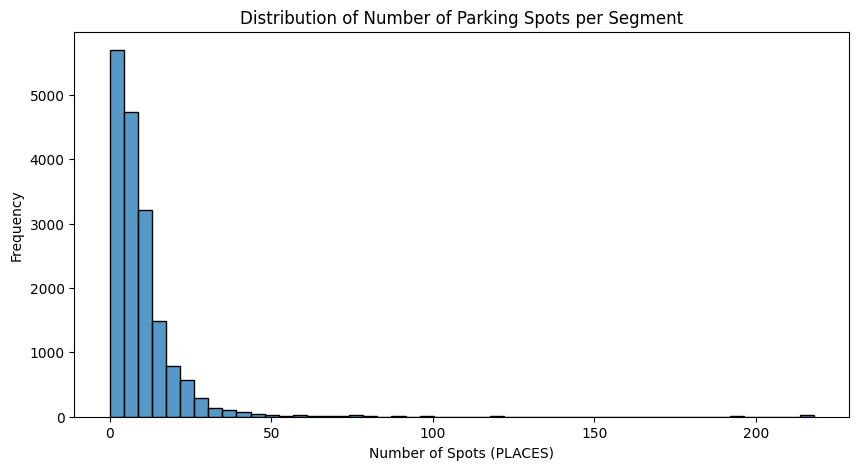


Summary statistics for PLACES:
count    17275.000000
mean         9.773430
std         12.642242
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        218.000000
Name: PLACES, dtype: float64


In [10]:
# Distribution of PLACES (Number of Spots)
if 'df_trams' in locals() and 'PLACES' in df_trams.columns and pd.api.types.is_numeric_dtype(df_trams['PLACES']):
    plt.figure(figsize=(10, 5))
    sns.histplot(df_trams['PLACES'].dropna(), bins=50, kde=False)
    plt.title('Distribution of Number of Parking Spots per Segment')
    plt.xlabel('Number of Spots (PLACES)')
    plt.ylabel('Frequency')
    plt.show()
    
    print("\nSummary statistics for PLACES:")
    print(df_trams['PLACES'].describe())
else:
    print("PLACES column not found or not numeric, skipping distribution plot.")


In [25]:
# --- Save Processed Data ---
import os 

# Ensure gdf_trams exists and is not empty before saving
if 'gdf_trams' in locals() and not gdf_trams.empty:
    OUTPUT_DIR = "../data/processed" 
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    OUTPUT_FILE = os.path.join(OUTPUT_DIR, "trams_processed.gpkg") # GeoPackage format

    try:
        print(f"\nSaving processed GeoDataFrame to: {OUTPUT_FILE}")
        # Ensure all column types are supported by GeoPackage driver before saving
        # Object columns can sometimes cause issues, check/convert if needed
        # Example: gdf_trams['some_object_column'] = gdf_trams['some_object_column'].astype(str)
        gdf_trams.to_file(OUTPUT_FILE, driver="GPKG", layer="trams")
        print("Saved successfully.")
    except Exception as e:
        print(f"Error saving GeoDataFrame: {e}")
        print("You might need to check column data types for GeoPackage compatibility (e.g., convert object columns to string).")
else:
    print("\nSkipping save: gdf_trams GeoDataFrame not found or is empty.")



Saving processed GeoDataFrame to: ../data/processed/trams_processed.gpkg
Saved successfully.
